<a href="https://colab.research.google.com/github/Ishita95-harvard/Amazon-Product-Images-Dataset-2025/blob/main/Amazon_Product_Images_Dataset_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon-Product-Images-Dataset-2025
15,000+ Amazon Product Images
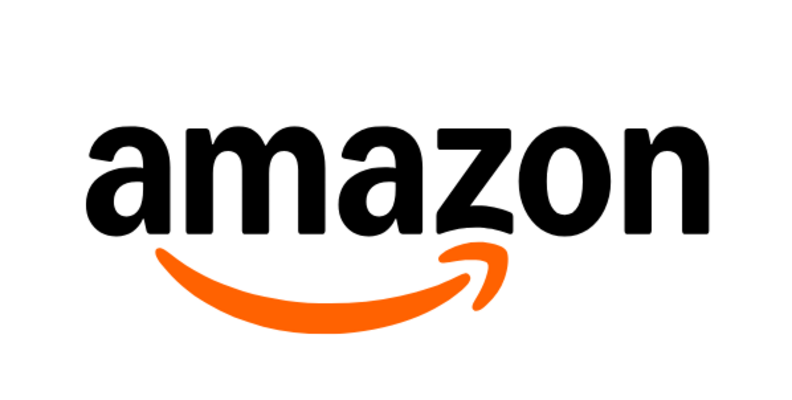

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umerhaddii/amazon-product-images-dataset-2025")

print("Path to dataset files:", path)

100%|██████████| 2.65G/2.65G [00:31<00:00, 91.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1


# Task
Execute the code in the notebook to load and inspect the downloaded dataset.

## Inspect the downloaded files

### Subtask:
Check the contents of the downloaded dataset to understand the file structure and identify the image files and any associated metadata (like a CSV file).


**Reasoning**:
List the contents of the downloaded dataset directory to understand the file structure and identify relevant files.



In [1]:
import os

# List all files and directories in the downloaded path
for root, dirs, files in os.walk(path):
    print(f"Directory: {root}")
    for name in files:
        print(f"File: {os.path.join(root, name)}")
    for name in dirs:
        print(f"Subdirectory: {os.path.join(root, name)}")


NameError: name 'path' is not defined

**Reasoning**:
The previous code failed because the `path` variable was not defined in the current session. Re-executing the code that downloads the dataset will define `path`.



In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("umerhaddii/amazon-product-images-dataset-2025")

print("Path to dataset files:", path)

# List all files and directories in the downloaded path
for root, dirs, files in os.walk(path):
    print(f"Directory: {root}")
    for name in files:
        print(f"File: {os.path.join(root, name)}")
    for name in dirs:
        print(f"Subdirectory: {os.path.join(root, name)}")

100%|██████████| 2.65G/2.65G [00:28<00:00, 99.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1
Directory: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1
Subdirectory: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images
Directory: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/915BbskNlZL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/51afwZcAcIL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/71WxyoaSsXL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/71dddzv7HrL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/imag

## Load and preprocess data

### Subtask:
Load any metadata file (e.g., CSV) into a pandas DataFrame and perform necessary preprocessing steps like handling missing values, parsing relevant information.


**Reasoning**:
Based on the previous output, there is no explicit metadata file like a CSV or JSON in the root directory. I will check inside the 'images' subdirectory for any such files and list the contents.



In [3]:
import os
import pandas as pd

images_path = os.path.join(path, 'images')

# List all files in the images directory
for root, dirs, files in os.walk(images_path):
    print(f"Directory: {root}")
    for name in files:
        print(f"File: {os.path.join(root, name)}")
    for name in dirs:
        print(f"Subdirectory: {os.path.join(root, name)}")


Directory: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/915BbskNlZL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/51afwZcAcIL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/71WxyoaSsXL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/71dddzv7HrL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/6105vnkWUxL.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/81Ggy5wqq+L.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-images-dataset-2025/versions/1/images/6196Z5prdPS.jpg
File: /root/.cache/kagglehub/datasets/umerhaddii/amazon-product-ima

## Simple Image Classification Example

This example demonstrates how to train a basic image classification model using a small subset of the downloaded images.

**Note:** This is a simplified example for demonstration purposes. A real-world image classification task would typically involve a larger dataset, more sophisticated model architecture, and extensive hyperparameter tuning.

In [4]:
import os
import random
import shutil
from PIL import Image

# Create a temporary directory for a small subset of images
subset_dir = '/tmp/amazon_subset'
os.makedirs(subset_dir, exist_ok=True)

# Get a list of all image files
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(images_path) for file in files if file.endswith('.jpg')]

# Select a small random subset of images
num_subset_images = 1000 # You can adjust this number
subset_images = random.sample(all_images, min(num_subset_images, len(all_images)))

# Copy the subset of images to the temporary directory
for img_path in subset_images:
    shutil.copy(img_path, subset_dir)

print(f"Created a subset of {len(subset_images)} images in {subset_dir}")

Created a subset of 1000 images in /tmp/amazon_subset


Now, let's load these images and prepare them for a simple model. We'll use a very basic approach here without any complex feature extraction.

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import UnidentifiedImageError # Import UnidentifiedImageError

# Function to load and resize images
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        return img_array
    except (IOError, UnidentifiedImageError) as e: # Catch IOError and UnidentifiedImageError
        print(f"Error loading image {image_path}: {e}")
        return None # Return None for corrupted images

# Load and preprocess the subset images, filtering out None values
subset_image_files = [os.path.join(subset_dir, f) for f in os.listdir(subset_dir) if f.endswith('.jpg')]
images_data = [load_and_preprocess_image(img_file) for img_file in subset_image_files]
images_data = np.array([img for img in images_data if img is not None]) # Filter out None values

# Normalize pixel values to be between 0 and 1
images_data = images_data / 255.0

print(f"Loaded and preprocessed {len(images_data)} images.")
print(f"Shape of images data: {images_data.shape}")

Error loading image /tmp/amazon_subset/61VkVDFhkuL.jpg: image file is truncated (4 bytes not processed)
Error loading image /tmp/amazon_subset/716dQJrplDL.jpg: image file is truncated (0 bytes not processed)
Error loading image /tmp/amazon_subset/81MW-lu784L.jpg: image file is truncated (3 bytes not processed)
Error loading image /tmp/amazon_subset/7134yHWGqXL.jpg: image file is truncated (1 bytes not processed)
Error loading image /tmp/amazon_subset/71OxkapqNhL.jpg: image file is truncated (8 bytes not processed)
Loaded and preprocessed 995 images.
Shape of images data: (995, 64, 64, 3)


Found 291 unique image dimensions in the subset.


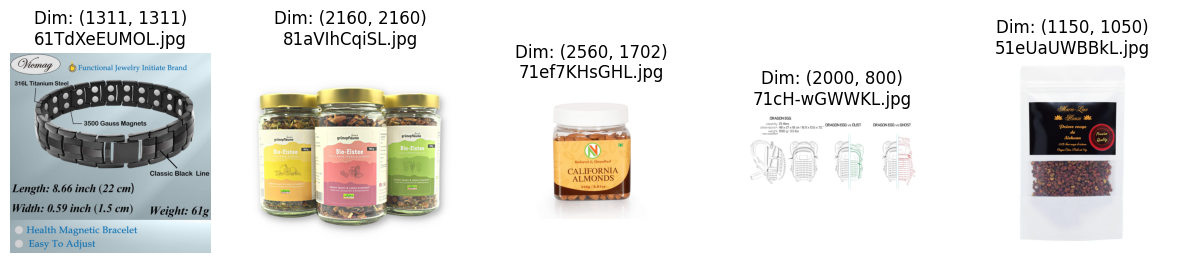

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# Get a list of all image files in the subset directory
subset_image_files = [os.path.join(subset_dir, f) for f in os.listdir(subset_dir) if f.endswith('.jpg')]

# Function to get image dimensions
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size # Returns a tuple (width, height)
    except (IOError, UnidentifiedImageError) as e:
        print(f"Error opening image {image_path}: {e}")
        return None

# Get dimensions for all images in the subset
image_dimensions = [(img_file, get_image_dimensions(img_file)) for img_file in subset_image_files]

# Filter out images that couldn't be opened
valid_images_dimensions = [(img_file, dim) for img_file, dim in image_dimensions if dim is not None]

if not valid_images_dimensions:
    print("No valid images found in the subset.")
else:
    # Group images by dimensions
    dimensions_dict = {}
    for img_file, dim in valid_images_dimensions:
        if dim not in dimensions_dict:
            dimensions_dict[dim] = []
        dimensions_dict[dim].append(img_file)

    print(f"Found {len(dimensions_dict)} unique image dimensions in the subset.")

    # Display one image for a few different dimensions
    num_dimensions_to_display = 5
    dimensions_to_display = random.sample(list(dimensions_dict.keys()), min(num_dimensions_to_display, len(dimensions_dict)))

    plt.figure(figsize=(15, 5))
    for i, dim in enumerate(dimensions_to_display):
        # Select a random image with this dimension
        img_path = random.choice(dimensions_dict[dim])
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_dimensions_to_display, i + 1)
            plt.imshow(img)
            plt.title(f"Dim: {dim}\n{os.path.basename(img_path)}")
            plt.axis('off')
        except (IOError, UnidentifiedImageError) as e:
            print(f"Could not display image {img_path}: {e}")

    plt.show()

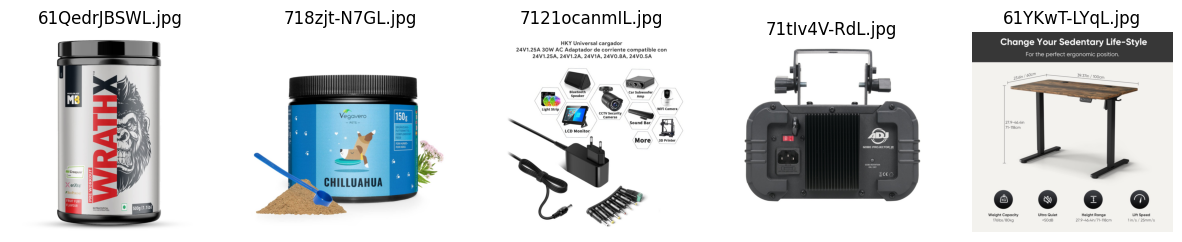

In [13]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img

# Get a list of all image files in the subset directory
subset_image_files = [os.path.join(subset_dir, f) for f in os.listdir(subset_dir) if f.endswith('.jpg')]

# Select a few random images to display
num_images_to_display = 5
display_images = random.sample(subset_image_files, min(num_images_to_display, len(subset_image_files)))

# Display the images
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(display_images):
    try:
        img = load_img(img_path)
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    except (IOError, UnidentifiedImageError) as e:
        print(f"Could not display image {img_path}: {e}")

plt.show()

Since we don't have explicit labels for these images in this dataset, we'll create some dummy labels for this example. In a real scenario, your labels would come from a metadata file or other source.

In [10]:
from sklearn.model_selection import train_test_split

# Create dummy labels (e.g., random labels for demonstration)
# In a real scenario, these would be your actual product categories or labels
num_images = len(images_data)
dummy_labels = np.random.randint(0, 2, num_images) # Example with 2 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_data, dummy_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (796, 64, 64, 3)
Testing data shape: (199, 64, 64, 3)
Training labels shape: (796,)
Testing labels shape: (199,)


Now, let's define and train a simple convolutional neural network (CNN) model using TensorFlow/Keras.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax') # 2 classes for our dummy labels
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("Model training finished.")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.4973 - loss: 0.9390 - val_accuracy: 0.5075 - val_loss: 0.6932
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.5268 - loss: 0.6912 - val_accuracy: 0.5075 - val_loss: 0.6916
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.5734 - loss: 0.6844 - val_accuracy: 0.5126 - val_loss: 0.6938
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.5838 - loss: 0.6736 - val_accuracy: 0.5226 - val_loss: 0.6905
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.6154 - loss: 0.6517 - val_accuracy: 0.5477 - val_loss: 0.6965
Model training finished.


Finally, let's evaluate the model's performance on the test set.

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5350 - loss: 0.7014
Test loss: 0.6965000629425049
Test accuracy: 0.5477386713027954
